# **Лучшая калибровка fitEllipse:**

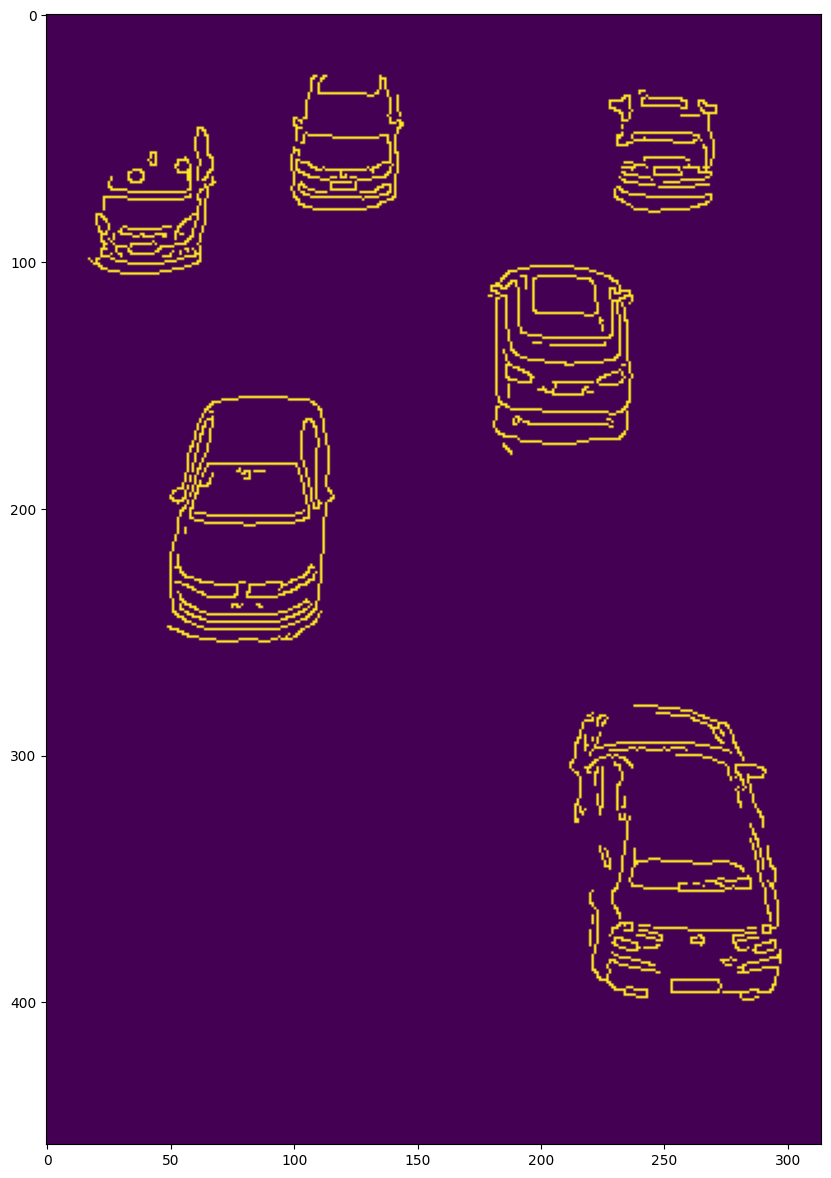

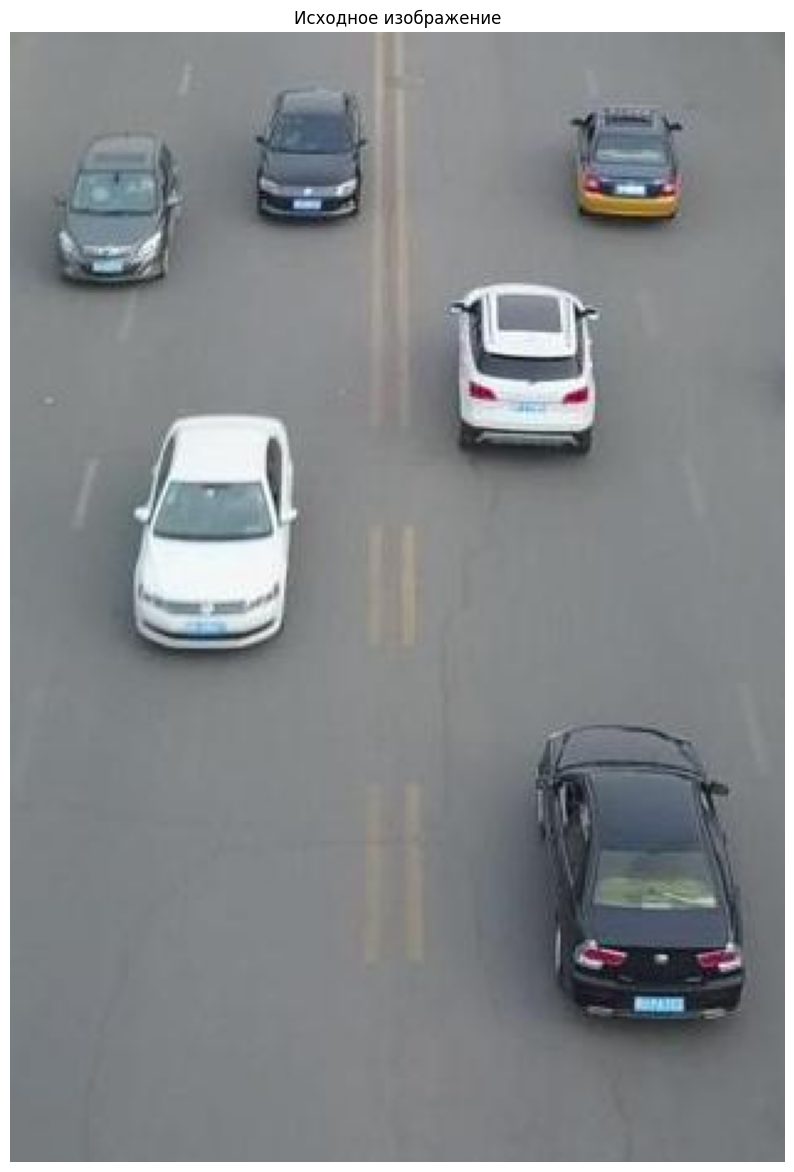

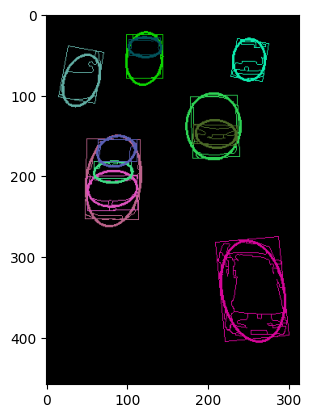

In [21]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def thresh_callback(val):
    threshold = val

    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_blur = cv.bilateralFilter(src_blur, d=9, sigmaColor=10, sigmaSpace=75)
    #plt.imshow(src_blur)

    canny_output = cv.Canny(src_blur, int(1*threshold), threshold * 2)
    plt.imshow(canny_output)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(canny_output, cv.MORPH_CLOSE, kernel)

    dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))
    kernel2 = np.ones((3, 3), np.uint8)
    eroded = cv.erode(dilated, kernel2, iterations=1)
    #plt.imshow(eroded)
    contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    # Draw contours + rotated rects + ellipses

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        area = cv.contourArea(c)

        if area < 600 or area > 15000:
            continue

        # Периметр контура
        perimeter = cv.arcLength(c, True)
        '''if perimeter == 0:
            continue'''

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.8:  # Слишком круглые объекты - скорее всего не автомобили
            continue

        # Фильтр по соотношению сторон
        width, height = minRect[i][1]
        aspect_ratio = max(width, height) / (min(width, height) + 0.000001)
        if aspect_ratio > 4.0:
            continue

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)

    # Отображаем результат
    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    plt.title('Исходное изображение')
    plt.axis('off')
    plt.show()

    plt.imshow(drawing)

if __name__ == "__main__":
    inp = '/content/0000330_00801_d_0000804.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    # Convert image to gray and blur it
    #src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_gray = cv.blur(src_gray, (3,3))

    plt.figure(figsize=(10, 18))
    #plt.imshow(src)

    thresh = 50 # initial threshold
    thresh_callback(thresh)

# **UPD: 10.05.2025 - было установлено, что бинаризация изображения в некоторых случаях негативно сказывается на обнаружении автомобилей.**

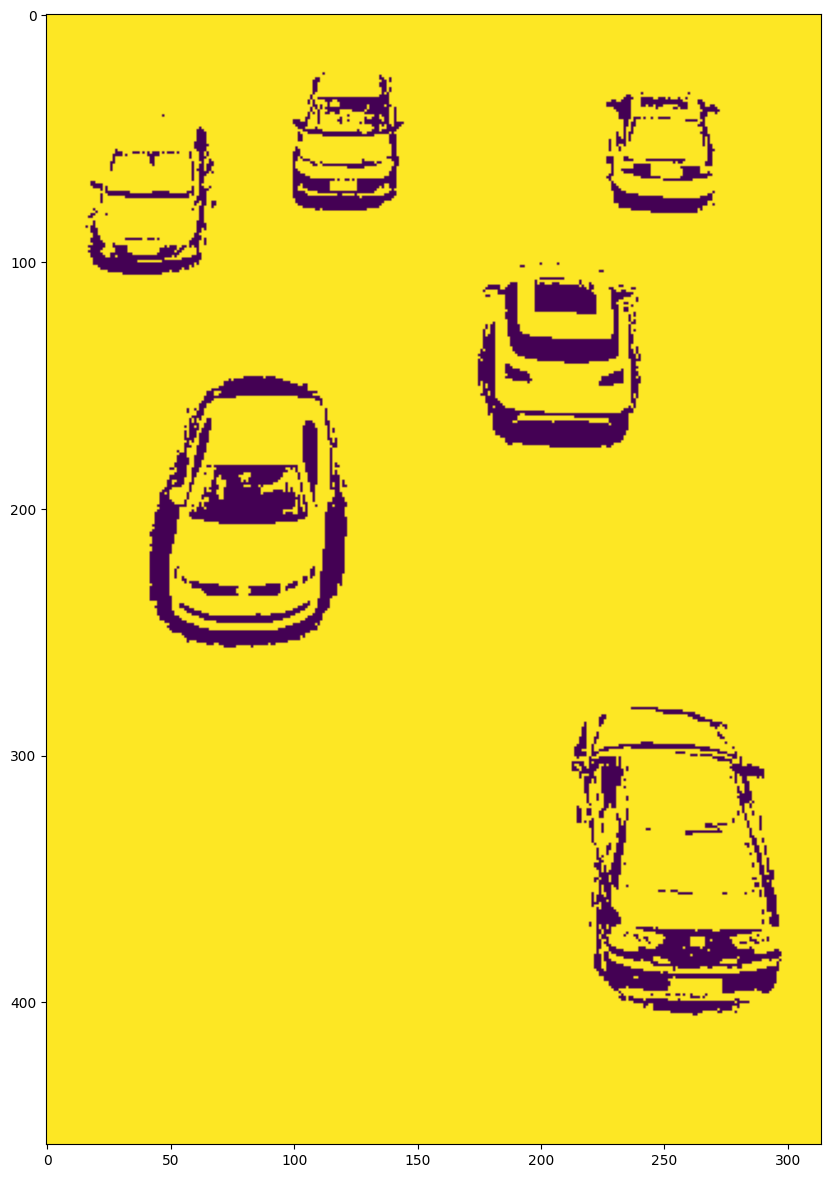

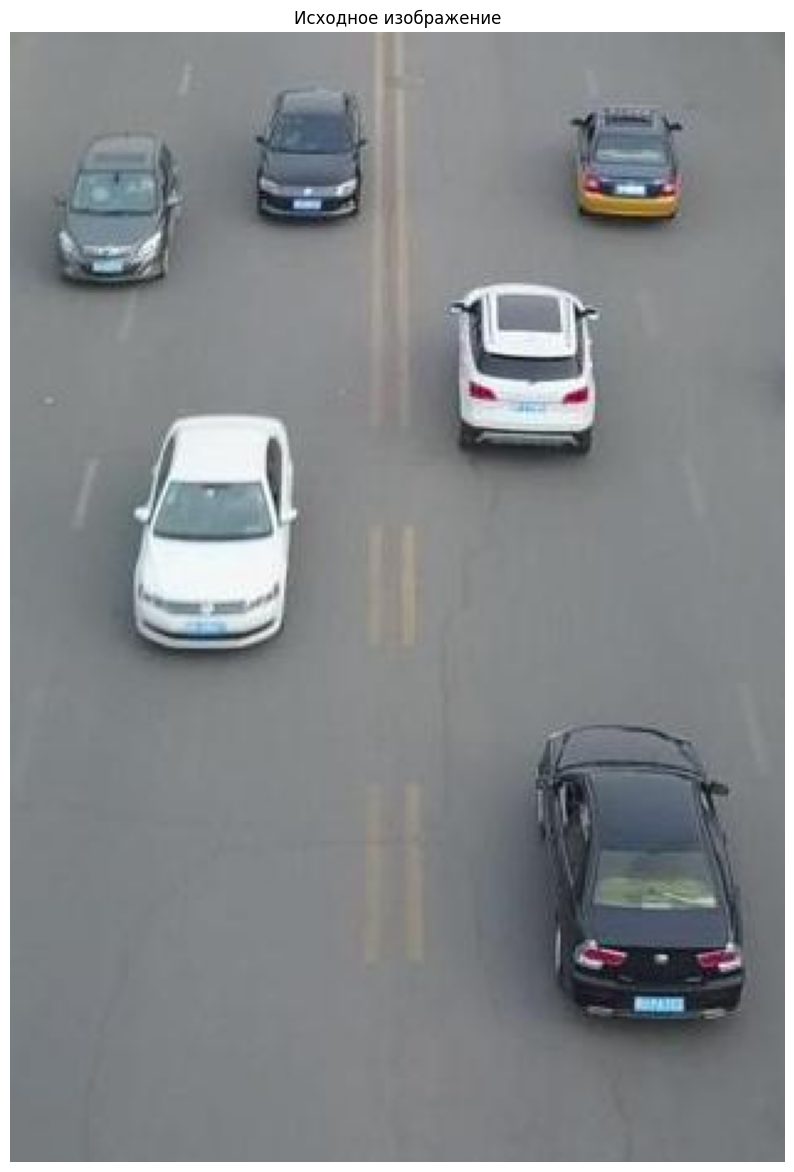

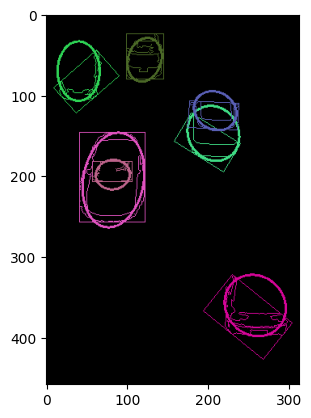

In [23]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def thresh_callback(val):
    threshold = val

    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_blur = cv.bilateralFilter(src_blur, d=9, sigmaColor=10, sigmaSpace=75)
    #plt.imshow(src_blur)

    th3 = cv.adaptiveThreshold(src_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 71, 21)
    plt.imshow(th3)
    #canny_output = cv.Canny(src_blur, int(1*threshold), threshold * 2)
    #plt.imshow(canny_output)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
    #closing = cv.morphologyEx(canny_output, cv.MORPH_CLOSE, kernel)

    #dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))
    #kernel2 = np.ones((3, 3), np.uint8)
    #eroded = cv.erode(dilated, kernel2, iterations=1)
    #plt.imshow(eroded)
    contours, _ = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    # Draw contours + rotated rects + ellipses

    drawing = np.zeros((th3.shape[0], th3.shape[1], 3), dtype=np.uint8)
    #drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        area = cv.contourArea(c)
        if area < 600 or area > 15000:
            continue

        # Периметр контура
        perimeter = cv.arcLength(c, True)
        '''if perimeter == 0:
            continue'''

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.8:  # Слишком круглые объекты - скорее всего не автомобили
            continue

        # Фильтр по соотношению сторон
        width, height = minRect[i][1]
        aspect_ratio = max(width, height) / (min(width, height) + 0.000001)
        if aspect_ratio > 4.0:
            continue

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)

    # Отображаем результат
    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    plt.title('Исходное изображение')
    plt.axis('off')
    plt.show()

    plt.imshow(drawing)

if __name__ == "__main__":
    inp = '/content/0000330_00801_d_0000804.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    # Convert image to gray and blur it
    #src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_gray = cv.blur(src_gray, (3,3))

    plt.figure(figsize=(10, 18))
    #plt.imshow(src)

    thresh = 50 # initial threshold
    thresh_callback(thresh)

# **Лучшая калибровка HoughCircles:**

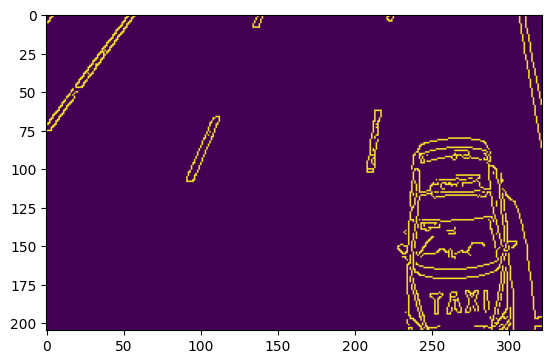

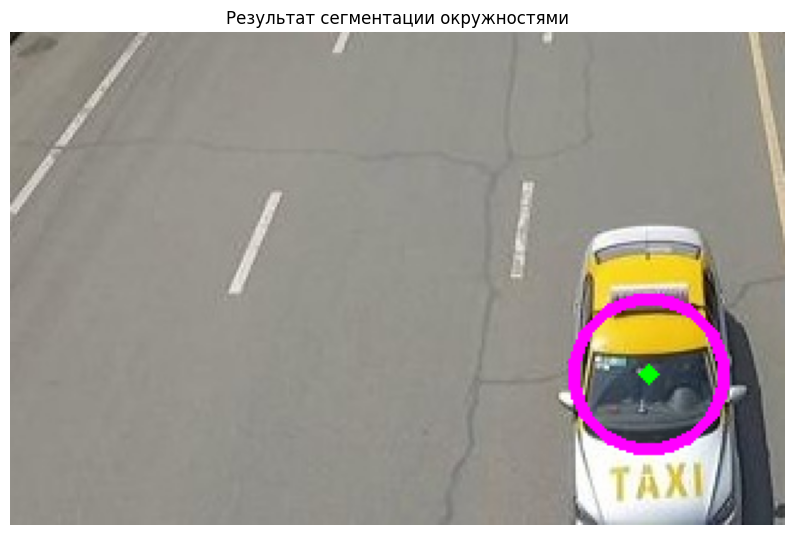

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def circle_segmentation(minDist=10, param1=100, param2=50, minRadius=60, maxRadius=0):
    threshold = 100

    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_blur = cv.bilateralFilter(src_gray, d=9, sigmaColor=10, sigmaSpace=75)
    #plt.imshow(src_blur)

    canny_output = cv.Canny(src_blur, int(1*threshold), threshold * 2)
    plt.imshow(canny_output)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(canny_output, cv.MORPH_CLOSE, kernel)

    #plt.imshow(eroded)
    #print(param2)
    # Запускаем преобразование Хафа для поиска окружностей
    circles = cv.HoughCircles(closing,
                              cv.HOUGH_GRADIENT,
                              dp=1.5,
                              minDist=minDist,
                              param1=param1,
                              param2=param2,
                              minRadius=minRadius,
                              maxRadius=maxRadius)

    # Создаём копию исходного изображения для отрисовки результатов
    drawing = src.copy()

    # Если окружности найдены, то округляем координаты и радиус и рисуем их
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            # Рисуем центр окружности
            cv.circle(drawing, center, 2, (0, 255, 0), 3)
            # Рисуем саму окружность
            cv.circle(drawing, center, radius, (255, 0, 255), 3)

    # Отображаем результат
    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
    plt.title('Результат сегментации окружностями')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    inp = '/content/output.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Не удалось открыть или найти изображение:', inp)
        exit(0)

    circle_segmentation(minDist=100, param1=100, param2=30, minRadius=10, maxRadius=50)

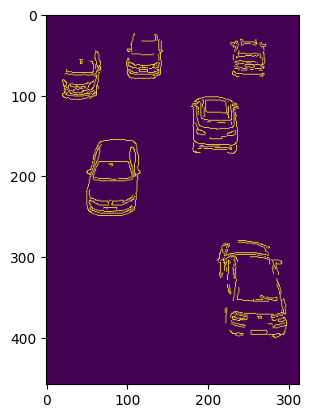

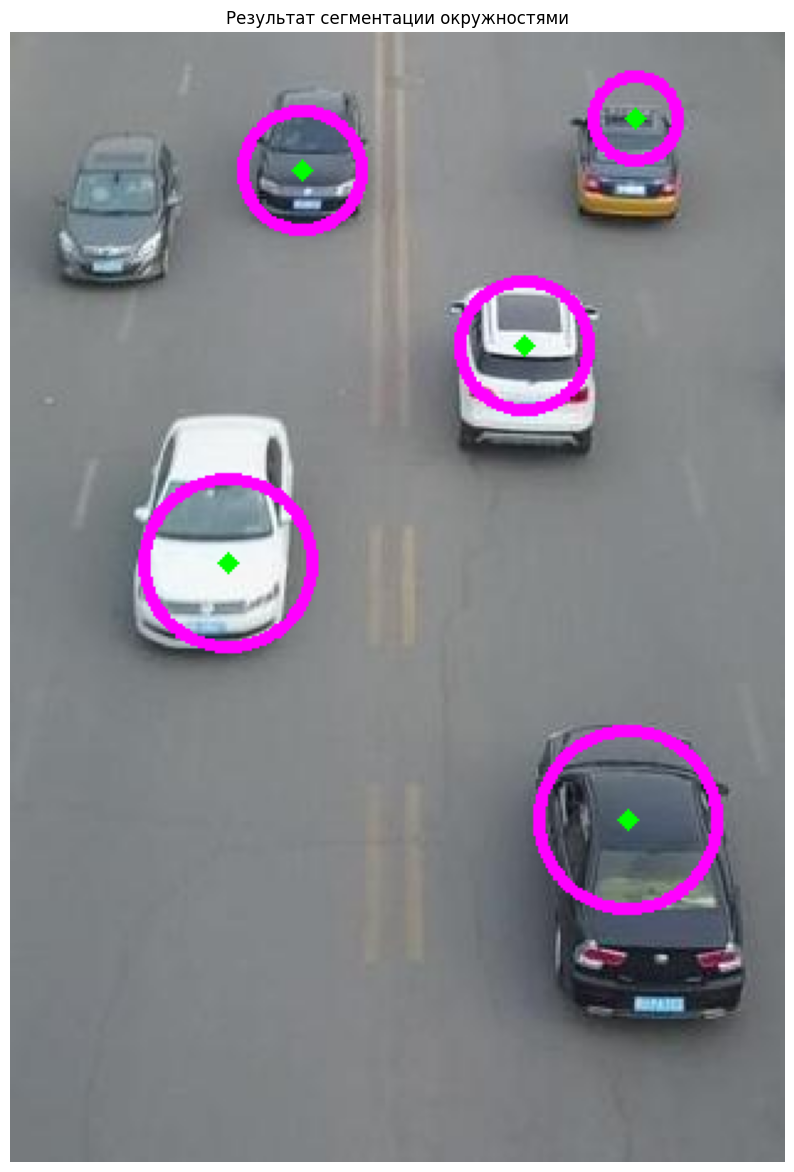

In [24]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def circle_segmentation(minDist=10, param1=100, param2=50, minRadius=60, maxRadius=0):
    threshold = 100

    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_blur = cv.bilateralFilter(src_gray, d=9, sigmaColor=10, sigmaSpace=75)
    #plt.imshow(src_blur)

    canny_output = cv.Canny(src_blur, int(1*threshold), threshold * 2)
    plt.imshow(canny_output)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(canny_output, cv.MORPH_CLOSE, kernel)

    #plt.imshow(eroded)
    #print(param2)
    # Запускаем преобразование Хафа для поиска окружностей
    circles = cv.HoughCircles(closing,
                              cv.HOUGH_GRADIENT,
                              dp=1.5,
                              minDist=minDist,
                              param1=param1,
                              param2=param2,
                              minRadius=minRadius,
                              maxRadius=maxRadius)

    # Создаём копию исходного изображения для отрисовки результатов
    drawing = src.copy()

    # Если окружности найдены, то округляем координаты и радиус и рисуем их
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            # Рисуем центр окружности
            cv.circle(drawing, center, 2, (0, 255, 0), 3)
            # Рисуем саму окружность
            cv.circle(drawing, center, radius, (255, 0, 255), 3)

    # Отображаем результат
    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
    plt.title('Результат сегментации окружностями')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    inp = '/content/0000330_00801_d_0000804.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Не удалось открыть или найти изображение:', inp)
        exit(0)

    circle_segmentation(minDist=100, param1=100, param2=30, minRadius=10, maxRadius=50)



---



In [ ]:
import cv2
import numpy as np

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    angle_rad = np.deg2rad(angle)

    # Новые размеры холста
    new_w = int(abs(w * np.cos(angle_rad)) + abs(h * np.sin(angle_rad)))
    new_h = int(abs(w * np.sin(angle_rad)) + abs(h * np.cos(angle_rad)))

    # Создание матрицы поворота с коррекцией смещения
    rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    rotation_matrix[0, 2] += (new_w - w) / 2  # Коррекция по X
    rotation_matrix[1, 2] += (new_h - h) / 2  # Коррекция по Y

    # Применение поворота с новыми размерами
    rotated_image = cv2.warpAffine(
        image,
        rotation_matrix,
        (new_w, new_h),
        flags=cv2.INTER_LINEAR,
        #borderMode=cv2.BORDER_TRANSPARENT,
        borderMode=cv2.BORDER_CONSTANT,
        #borderValue=(0, 0, 0)  # Фон (можно задать другой цвет)
    )
    return rotated_image

def crop_black_borders(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        return image[y:y+h, x:x+w]
    return image

def inpaint_black_areas(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)[1]
    return cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Загрузка изображения
image = cv2.imread("car.jpg")

# Поворот на 45 градусов без черных областей
#rotated = rotate_image(image, 35)
#cropped_rotated = crop_black_borders(rotated)

# Поворот с прозрачностью
rotated = rotate_image(image, 125)
#rotated = inpaint_black_areas(rotated)

gray_rotated = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_rotated, 1, 255, cv2.THRESH_BINARY)

cv2.imwrite("mask.jpg", mask)
# Сохранение результата
cv2.imwrite("rotated_image.jpg", rotated)

True

True

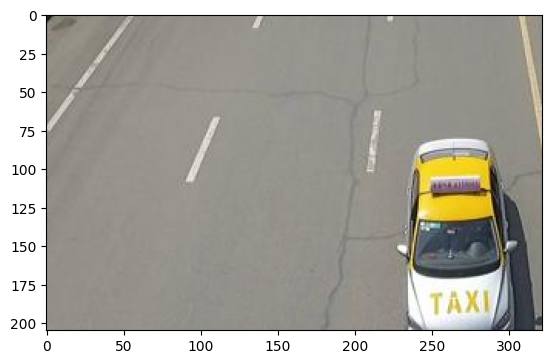

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/0000242_00627_d_0000003.jpg')
x = 196
y = 335
w = 322
h = 205
img_roi = image[y:(y+h), x:(x+w)]
imgshow = cv2.cvtColor(img_roi, cv2.COLOR_BGR2RGB)
plt.imshow(imgshow)

cv2.imwrite('output.jpg', img_roi)

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving frames.txt to frames.txt


In [ ]:
!unzip "/content/VisDrone2019-DET-val.zip" -d "/content/dataset"

Archive:  /content/VisDrone2019-DET-val.zip
   creating: /content/dataset/VisDrone2019-DET-val/
  inflating: /content/dataset/VisDrone2019-DET-val/.DS_Store  
   creating: /content/dataset/VisDrone2019-DET-val/annotations/
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_02999_d_0000005.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_03499_d_0000006.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_03999_d_0000007.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_04527_d_0000008.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_05249_d_0000009.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_05499_d_0000010.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_05999_d_0000011.txt  
  inflating: /content/dataset/VisDrone2019-DET-val/annotations/0000001_07999_d_0000012.txt  
  inflating: /content/dataset/Vis

In [ ]:
import os
from PIL import Image

# Определение директорий
images_dir = '/content/dataset/VisDrone2019-DET-val/images'
annotations_dir = '/content/dataset/VisDrone2019-DET-val/annotations'
newimages_dir = '/content/newimages'
newannotations_dir = '/content/newannotations'
frames_file = '/content/frames.txt'

# Создание новых директорий, если они не существуют
os.makedirs(newimages_dir, exist_ok=True)
os.makedirs(newannotations_dir, exist_ok=True)

# Чтение frames.txt и обработка каждой строки
with open(frames_file, 'r') as f:
    for line in f:
        parts = [p.strip() for p in line.strip().split(',')]
        if len(parts) >= 5:
            image_name = parts[0]
            try:
                X = int(parts[1])
                Y = int(parts[2])
                width_crop = int(parts[3])
                height_crop = int(parts[4])
            except ValueError:
                print(f"Некорректные координаты в строке frames.txt: {line.strip()}")
                continue

            # Проверка валидности координат обрезки
            if width_crop <= 0 or height_crop <= 0 or X < 0 or Y < 0:
                print(f"Некорректные размеры обрезки для {image_name}: X={X}, Y={Y}, width={width_crop}, height={height_crop}")
                continue

            # Формирование полных путей
            image_path = os.path.join(images_dir, image_name)
            annotation_path = os.path.join(annotations_dir, os.path.splitext(image_name)[0] + '.txt')
            new_image_path = os.path.join(newimages_dir, image_name)
            new_annotation_path = os.path.join(newannotations_dir, os.path.splitext(image_name)[0] + '.txt')

            # Шаг 1: Обрезка изображения
            if os.path.exists(image_path):
                try:
                    img = Image.open(image_path)
                    cropped_img = img.crop((X, Y, X + width_crop, Y + height_crop))
                    cropped_img.save(new_image_path)
                except Exception as e:
                    print(f"Ошибка при обработке изображения {image_path}: {e}")
                    continue
            else:
                print(f"Изображение не найдено: {image_path}")
                continue

            # Шаг 2: Обработка аннотаций
            adjusted_lines = []
            if os.path.exists(annotation_path):
                with open(annotation_path, 'r') as ann_f:
                    for ann_line in ann_f:
                        ann_parts = [p.strip() for p in ann_line.strip().split(',')]
                        if len(ann_parts) >= 6:
                            try:
                                left = int(ann_parts[0])
                                top = int(ann_parts[1])
                                width = int(ann_parts[2])
                                height = int(ann_parts[3])
                                ignored = ann_parts[4]
                                class_label = ann_parts[5]
                                rest = ann_parts[6:] if len(ann_parts) > 6 else []
                            except ValueError:
                                print(f"Некорректная строка аннотации в {annotation_path}: {ann_line.strip()}")
                                continue

                            # Фильтрация по классу 4 (автомобили) и ignored = 0
                            if class_label == '4':
                                # Проверка пересечения с областью обрезки
                                if left >= X and top >= Y and (left + width) <= (X + width_crop) and (top + height) <= (Y + height_crop):
                                    # Пересчет координат относительно обрезанного изображения
                                    new_left = left - X
                                    new_top = top - Y
                                    # Формирование новой строки аннотации
                                    new_ann_parts = [str(new_left), str(new_top), str(width), str(height), ignored, class_label] + rest
                                    adjusted_lines.append(','.join(new_ann_parts) + '\n')

            # Шаг 3: Сохранение аннотаций, если они есть
            if adjusted_lines:
                with open(new_annotation_path, 'w') as new_ann_f:
                    new_ann_f.writelines(adjusted_lines)

print("Обработка завершена.")

Обработка завершена.


In [ ]:
import cv2
import os


# Определение директорий
newimages_dir = '/content/newimages'
newannotations_dir = '/content/newannotations'
visualized_dir = 'visualized'

# Создание директории для визуализированных изображений, если она не существует
os.makedirs(visualized_dir, exist_ok=True)

# Получение списка файлов аннотаций
annotation_files = [f for f in os.listdir(newannotations_dir) if f.endswith('.txt')]

# Обработка каждого файла аннотаций
for ann_file in annotation_files:
    # Получение базового имени файла без расширения
    base_name = os.path.splitext(ann_file)[0]

    # Поиск соответствующего изображения (сначала .jpg, затем .png)
    image_file = base_name + '.jpg'
    image_path = os.path.join(newimages_dir, image_file)
    if not os.path.exists(image_path):
        image_file = base_name + '.png'
        image_path = os.path.join(newimages_dir, image_file)
        if not os.path.exists(image_path):
            print(f"Изображение не найдено для {ann_file}")
            continue

    # Чтение изображения
    image = cv2.imread(image_path)
    if image is None:
        print(f"Не удалось прочитать изображение {image_path}")
        continue

    # Чтение файла аннотаций
    ann_path = os.path.join(newannotations_dir, ann_file)
    with open(ann_path, 'r') as f:
        lines = f.readlines()

    # Рисование bounding boxes на изображении
    for line in lines:
        parts = line.strip().split(',')
        if len(parts) >= 4:
            try:
                left = int(parts[0])
                top = int(parts[1])
                width = int(parts[2])
                height = int(parts[3])
            except ValueError:
                print(f"Некорректная аннотация в {ann_file}: {line}")
                continue

            # Рисование прямоугольника
            cv2.rectangle(image, (left, top), (left + width, top + height), (0, 255, 0), 2)

    # Сохранение визуализированного изображения
    visualized_file = base_name + '_visualized' + os.path.splitext(image_file)[1]
    visualized_path = os.path.join(visualized_dir, visualized_file)
    cv2.imwrite(visualized_path, image)

print("Визуализация завершена. Проверьте директорию 'visualized'.")

Визуализация завершена. Проверьте директорию 'visualized'.


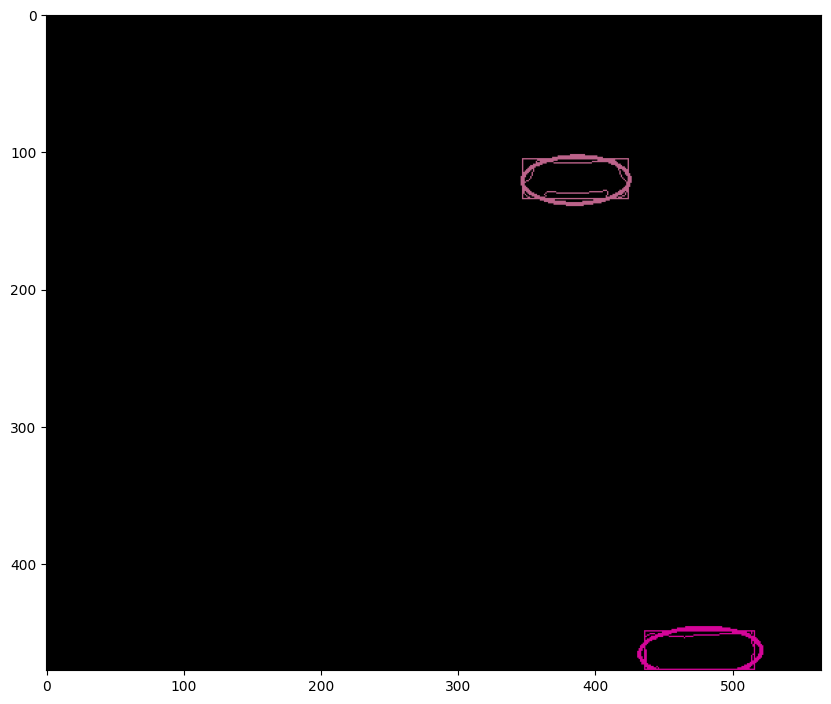

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def thresh_callback(val):
    threshold = val

    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_blur = cv.bilateralFilter(src_gray, d=9, sigmaColor=10, sigmaSpace=75)

    canny_output = cv.Canny(src_blur, int(1*threshold), threshold * 2)
    plt.imshow(canny_output)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(canny_output, cv.MORPH_CLOSE, kernel)

    dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))
    eroded = cv.erode(dilated, kernel, iterations=1)
    plt.imshow(eroded)
    contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    # Draw contours + rotated rects + ellipses

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        area = cv.contourArea(c)

        if area < 1000 or area > 15000:
            continue

        # Периметр контура
        perimeter = cv.arcLength(c, True)
        if perimeter == 0:
            continue

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.6:  # Слишком круглые объекты - скорее всего не автомобили
            continue

        # Фильтр по соотношению сторон
        width, height = minRect[i][1]
        aspect_ratio = max(width, height) / min(width, height)
        if aspect_ratio < 1.5 or aspect_ratio > 3.0:
            continue

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)

    #plt.imshow(drawing)

if __name__ == "__main__":
    inp = 'test2.jpg'
    src = cv.imread(cv.samples.findFile(inp), cv.IMREAD_GRAYSCALE)
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    # Convert image to gray and blur it
    #src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_gray = cv.blur(src_gray, (3,3))

    plt.figure(figsize=(10, 18))

    #plt.imshow(src)
    #src_gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    img = cv.medianBlur(src, 5)
    th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

    contours, _ = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    # Draw contours + rotated rects + ellipses

    drawing = np.zeros((th3.shape[0], th3.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        area = cv.contourArea(c)

        if area < 1000 or area > 30000:
            continue

        # Периметр контура
        perimeter = cv.arcLength(c, True)
        if perimeter == 0:
            continue

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.6:  # Слишком круглые объекты - скорее всего не автомобили
            continue

        # Фильтр по соотношению сторон
        width, height = minRect[i][1]
        aspect_ratio = max(width, height) / min(width, height)
        if aspect_ratio < 1.5 or aspect_ratio > 3.0:
            continue

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)

    plt.imshow(drawing)

    #plt.imshow(th3)
    #thresh = 100 # initial threshold
    #thresh_callback(thresh)

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def thresh_callback(val):
    threshold = val

    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

    #blurred = cv.medianBlur(src_gray, 3)
    #clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
    #enhanced = clahe.apply(src_gray)

    #src_blur = cv.GaussianBlur(enhanced, (3, 3), 0)

    canny_output = cv.Canny(src_gray, int(1*threshold), threshold * 2)

    #dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))

    # Применение морфологических операций для соединения близких контуров и удаления шума
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv.dilate(canny_output, kernel, iterations=1)
    eroded = cv.erode(dilated, kernel, iterations=1)

    plt.imshow(eroded)
    contours, _ = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    # Draw contours + rotated rects + ellipses

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        area = cv.contourArea(c)

        if area < 1000 or area > 30000:
            continue

        # Периметр контура
        perimeter = cv.arcLength(c, True)
        if perimeter == 0:
            continue

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.9:  # Слишком круглые объекты - скорее всего не автомобили
            print(circularity)
            continue

        # Фильтр по соотношению сторон
        rect = cv.minAreaRect(c)
        width, height = rect[1]
        aspect_ratio = max(width, height) / min(width, height)
        if aspect_ratio < 1.1:
            print(aspect_ratio)
            continue

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)

    plt.imshow(drawing)

if __name__ == "__main__":
    inp = '0000026_03000_d_0000030.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    # Convert image to gray and blur it
    #src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_gray = cv.blur(src_gray, (3,3))

    plt.figure(figsize=(10, 18))
    #plt.imshow(src)

    thresh = 100 # initial threshold
    thresh_callback(thresh)

error: OpenCV(4.11.0) /io/opencv/modules/core/src/utils/samples.cpp:64: error: (-2:Unspecified error) OpenCV samples: Can't find required data file: 0000026_03000_d_0000030.jpg in function 'findFile'


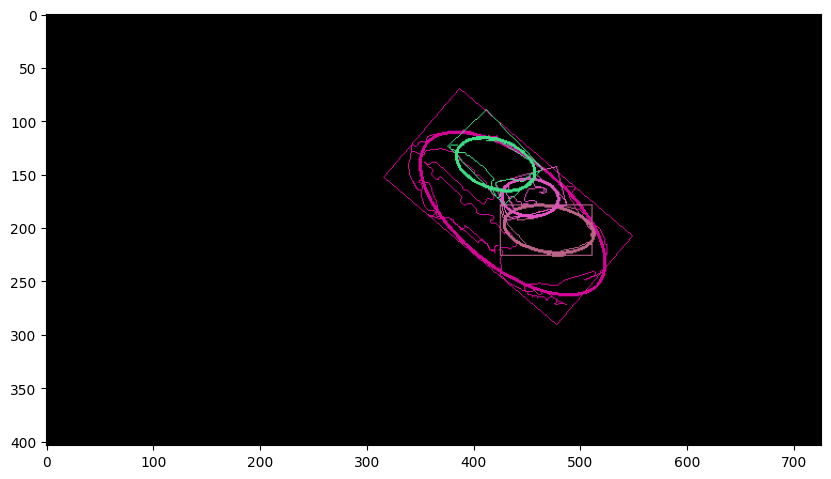

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def thresh_callback(val):
    threshold = val

    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)
    src_blur = cv.bilateralFilter(src_gray, d=9, sigmaColor=10, sigmaSpace=75)
    #plt.imshow(src_blur)

    canny_output = cv.Canny(src_blur, int(1*threshold), threshold * 2)
    plt.imshow(canny_output)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(canny_output, cv.MORPH_CLOSE, kernel)

    dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))
    kernel2 = np.ones((3, 3), np.uint8)
    eroded = cv.erode(dilated, kernel2, iterations=1)
    #plt.imshow(eroded)
    contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    # Draw contours + rotated rects + ellipses

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        area = cv.contourArea(c)

        if area < 1000 or area > 15000:
            continue

        '''# Периметр контура
        perimeter = cv.arcLength(c, True)
        if perimeter == 0:
            continue

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.6:  # Слишком круглые объекты - скорее всего не автомобили
            continue

        # Фильтр по соотношению сторон
        width, height = minRect[i][1]
        aspect_ratio = max(width, height) / min(width, height)
        if aspect_ratio < 1.5 or aspect_ratio > 3.0:
            continue'''

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)

    plt.imshow(drawing)

if __name__ == "__main__":
    inp = 'test.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    # Convert image to gray and blur it
    #src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #src_gray = cv.blur(src_gray, (3,3))

    plt.figure(figsize=(10, 18))
    '''plt.imshow(src)'''

    thresh = 50 # initial threshold
    thresh_callback(thresh)

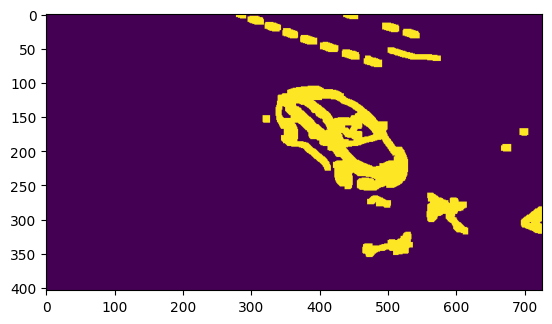

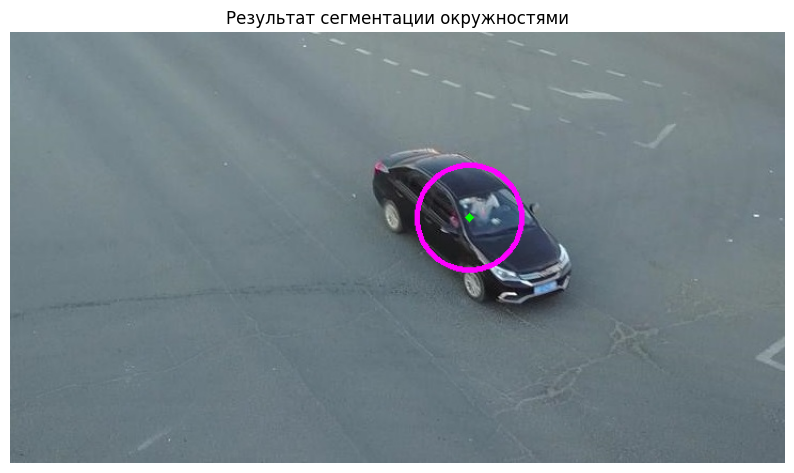

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def circle_segmentation(minDist=10, param1=100, param2=50, minRadius=60, maxRadius=0):
    threshold = 100
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

    #clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(3, 3))
    #enhanced = clahe.apply(src_gray)

    #plt.imshow(enhanced)

    #blurred = cv.medianBlur(src_gray, 5)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
    enhanced = clahe.apply(src_gray)

    blurred = cv.GaussianBlur(enhanced, (5, 5), 0)

    canny_output = cv.Canny(blurred, int(0.5*threshold), int(threshold * 1.5))

    kernel2 = np.ones((8, 8), np.uint8)
    dilated = cv.dilate(canny_output, kernel2, iterations=1) # +

    plt.imshow(dilated)

    #kernel2 = np.ones((3, 3), np.uint8)
    #eroded = cv.erode(dilated, kernel2, iterations=1)

    #kernel2 = np.ones((3, 3), np.uint8)
    #closing = cv.morphologyEx(dilated, cv.MORPH_CLOSE, kernel2)

    #opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel2)

    #plt.imshow(opening)
    #dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))

    # Применение морфологических операций для соединения близких контуров и удаления шума
    #kernel = np.ones((5, 5), np.uint8)
    #dilated = cv.dilate(canny_output, kernel, iterations=1)

    kernel3 = np.ones((3, 3), np.uint8)
    eroded = cv.erode(dilated, kernel3, iterations=1)

    #plt.imshow(eroded)
    #print(param2)
    # Запускаем преобразование Хафа для поиска окружностей
    circles = cv.HoughCircles(eroded,
                              cv.HOUGH_GRADIENT,
                              dp=1.3,
                              minDist=minDist,
                              param1=param1,
                              param2=param2,
                              minRadius=2,
                              maxRadius=80)

    # Создаём копию исходного изображения для отрисовки результатов
    drawing = src.copy()

    # Если окружности найдены, то округляем координаты и радиус и рисуем их
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            # Рисуем центр окружности
            cv.circle(drawing, center, 2, (0, 255, 0), 3)
            # Рисуем саму окружность
            cv.circle(drawing, center, radius, (255, 0, 255), 3)

    # Отображаем результат
    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
    plt.title('Результат сегментации окружностями')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    inp = 'test.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Не удалось открыть или найти изображение:', inp)
        exit(0)

    circle_segmentation(minDist=100, param1=100, param2=30, minRadius=10, maxRadius=0)

(264, 217, 3)


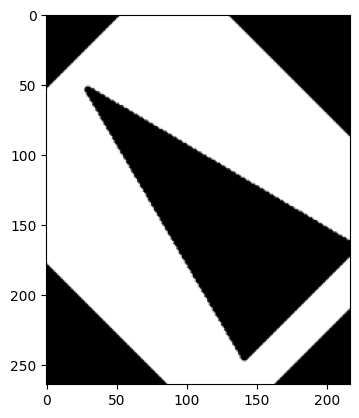

In [ ]:
'''scales = np.arange(0.5, 1.51, 0.1)
angles = np.arange(-90, 91, 1)

print(scales, angles)'''

import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fn = "triang.png" # путь к файлу с картинкой
img = cv.imread(fn)

scale = 1
angle = 45
tH_orig, tW_orig = img.shape[:2]
tW = int(tW_orig * scale)
tH = int(tH_orig * scale)

resized = cv.resize(img, (tW, tH))
center = (tW // 2, tH // 2)
M = cv.getRotationMatrix2D(center, angle, 1.0)
rotated = cv.warpAffine(resized, M, (tW, tH))

print(rotated.shape)
plt.imshow(rotated)

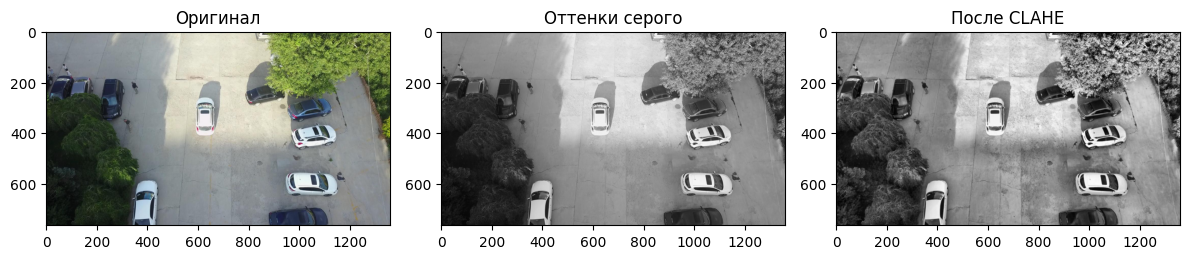

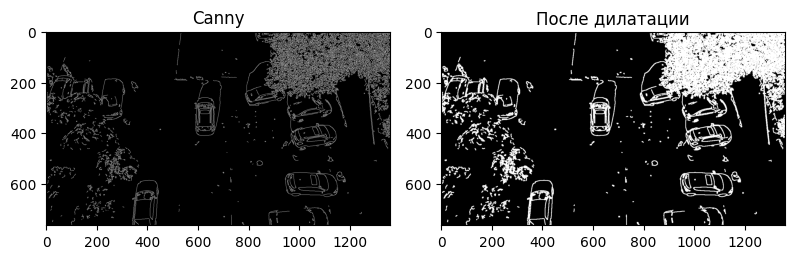

Всего найдено контуров: 269
2.1211820897997673
1.7031251629149218
1.9525482176397815
1.7681657979888181
1.6857142857142857
1.6196581588384116
1.6947367266681164
5.34715833006914
1.1904761904761905
1.4351111843818616
1.1461538516238154
1.8935017622114758
1.3187918912687604
2.6
3.8888890507037
2.0145900065632825
1.9602873150516147
1.0
2.167271557192432
1.2511091475255665
1.269179306334181
Обнаружено автомобилей: 12


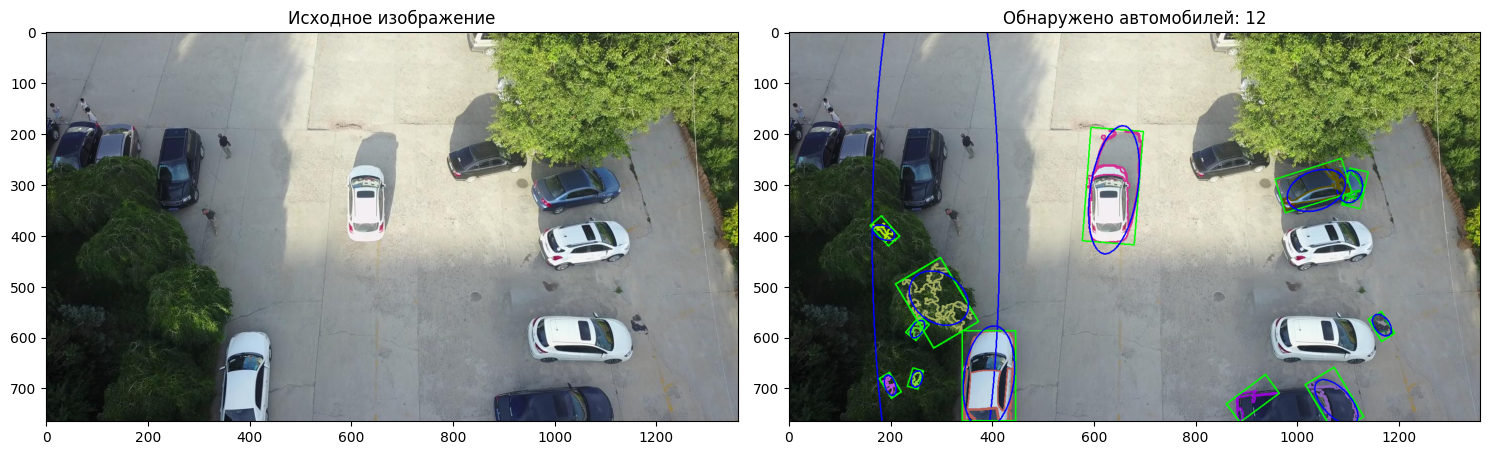

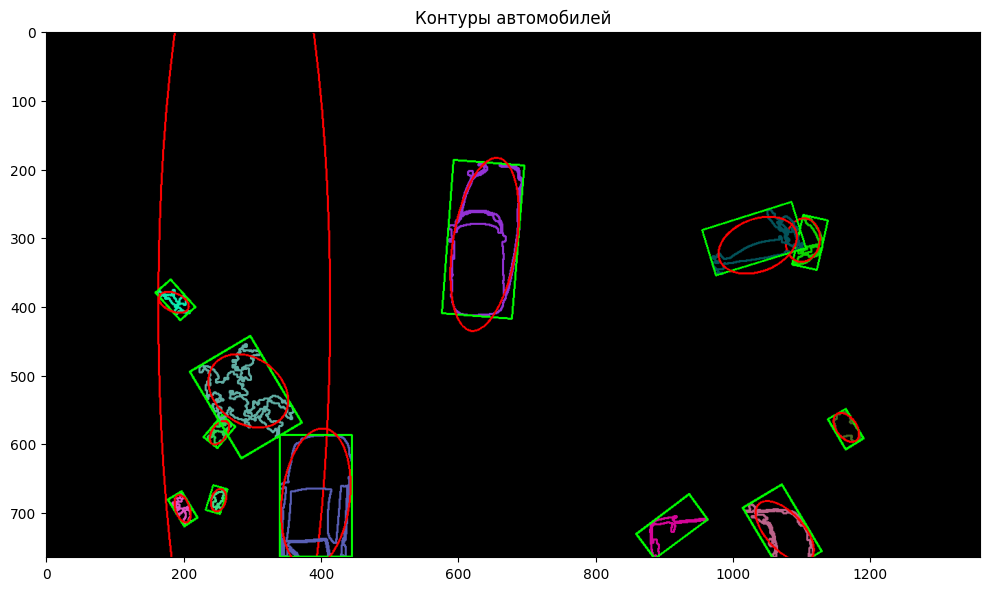

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def car_segmentation(image_path, display_intermediate=False):
    # Загрузка изображения
    src = cv.imread(cv.samples.findFile(image_path))
    if src is None:
        print('Could not open or find the image:', image_path)
        return None, None

    # Копия для отображения результатов
    original = src.copy()

    # Преобразование в оттенки серого
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

    # Применение легкого гауссова размытия для уменьшения шума
    src_blur = cv.GaussianBlur(src_gray, (3, 3), 0)

    # Улучшение контрастности для лучшего выделения контуров
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(src_blur)

    if display_intermediate:
        plt.figure(figsize=(12, 4))
        plt.subplot(131)
        plt.title("Оригинал")
        plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
        plt.subplot(132)
        plt.title("Оттенки серого")
        plt.imshow(src_gray, cmap='gray')
        plt.subplot(133)
        plt.title("После CLAHE")
        plt.imshow(enhanced, cmap='gray')
        plt.tight_layout()
        plt.show()

    # Применение Canny для обнаружения краев
    # Используем более низкий порог для обнаружения большего количества краев
    threshold_low = 150
    threshold_high = 250
    canny_output = cv.Canny(enhanced, threshold_low, threshold_high)

    # Морфологические операции для соединения разрывов в контурах
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv.dilate(canny_output, kernel, iterations=1)

    if display_intermediate:
        plt.figure(figsize=(12, 4))
        plt.subplot(131)
        plt.title("Canny")
        plt.imshow(canny_output, cmap='gray')
        plt.subplot(132)
        plt.title("После дилатации")
        plt.imshow(dilated, cmap='gray')
        plt.tight_layout()
        plt.show()

    # Поиск контуров
    contours, hierarchy = cv.findContours(dilated, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Подготовка изображений для результатов
    drawing = np.zeros((src.shape[0], src.shape[1], 3), dtype=np.uint8)
    result_overlay = src.copy()

    # Параметры для фильтрации контуров
    # Расширяем диапазоны для захвата большего количества потенциальных автомобилей
    min_car_area = 300  # Уменьшаем минимальную площадь
    max_car_area = 15000  # Увеличиваем максимальную площадь
    min_aspect_ratio = 1.4  # Более гибкое соотношение сторон
    max_aspect_ratio = 2.5  # Более гибкое соотношение сторон

    detected_cars = []

    print(f"Всего найдено контуров: {len(contours)}")
    car_count = 0

    for i, contour in enumerate(contours):
        # Базовые проверки
        area = cv.contourArea(contour)

        # Пропускаем слишком маленькие контуры (шум)
        if area < min_car_area:
            continue

        # Пропускаем слишком большие контуры (не автомобили)
        if area > max_car_area:
            continue

        # Получаем минимальный ограничивающий прямоугольник
        rect = cv.minAreaRect(contour)
        width, height = rect[1]

        # Избегаем деления на ноль
        if width == 0 or height == 0:
            continue

        # Вычисляем соотношение сторон
        aspect_ratio = max(width, height) / min(width, height)
        print(aspect_ratio)

        # Пропускаем объекты с нехарактерным для автомобилей соотношением сторон
        if aspect_ratio < min_aspect_ratio or aspect_ratio > max_aspect_ratio:
            continue

        # Периметр контура
        perimeter = cv.arcLength(contour, True)
        if perimeter == 0:
            continue

        # Вычисляем меру округлости (circularity)
        # Для автомобилей характерна прямоугольная форма, а не круглая
        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > 0.8:  # Слишком круглые объекты - скорее всего не автомобили
            continue

        car_count += 1
        detected_cars.append(contour)

        # Рисуем результаты
        color = (rng.randint(0, 255), rng.randint(0, 255), rng.randint(0, 255))

        # Рисуем контур
        cv.drawContours(drawing, [contour], 0, color, 2)
        cv.drawContours(result_overlay, [contour], 0, color, 2)

        # Рисуем прямоугольник
        box = cv.boxPoints(rect)
        box = np.intp(box)
        cv.drawContours(drawing, [box], 0, (0, 255, 0), 2)
        cv.drawContours(result_overlay, [box], 0, (0, 255, 0), 2)

        # Рисуем эллипс, если достаточно точек
        if contour.shape[0] > 5:
            ellipse = cv.fitEllipse(contour)
            cv.ellipse(drawing, ellipse, (255, 0, 0), 2)
            cv.ellipse(result_overlay, ellipse, (255, 0, 0), 2)

    print(f"Обнаружено автомобилей: {car_count}")

    # Отображение результатов
    plt.figure(figsize=(15, 10))
    plt.subplot(121)
    plt.title("Исходное изображение")
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

    plt.subplot(122)
    plt.title(f"Обнаружено автомобилей: {car_count}")
    plt.imshow(cv.cvtColor(result_overlay, cv.COLOR_BGR2RGB))
    plt.tight_layout()

    plt.figure(figsize=(10, 8))
    plt.title("Контуры автомобилей")
    plt.imshow(drawing)
    plt.tight_layout()

    plt.show()

    return drawing, result_overlay

if __name__ == "__main__":
    # Путь к изображению из датасета VisDrone2019
    image_path = '0000026_00500_d_0000025.jpg'

    # Установите True для отображения промежуточных результатов обработки
    car_segmentation(image_path, display_intermediate=True)

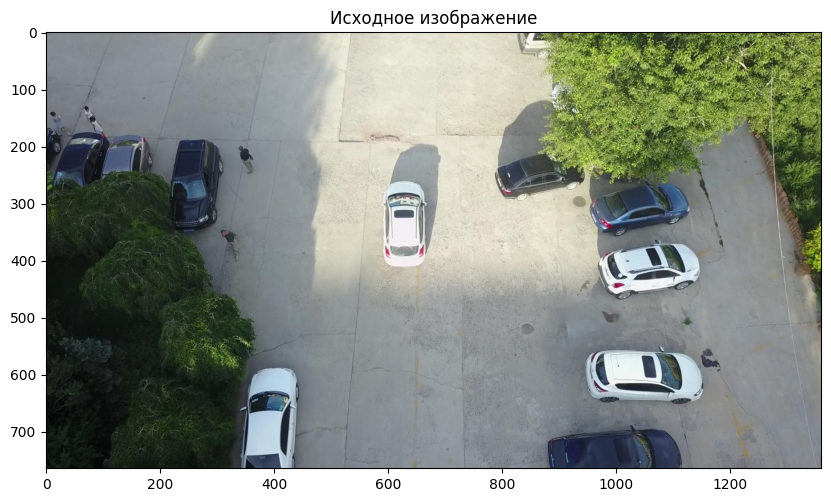

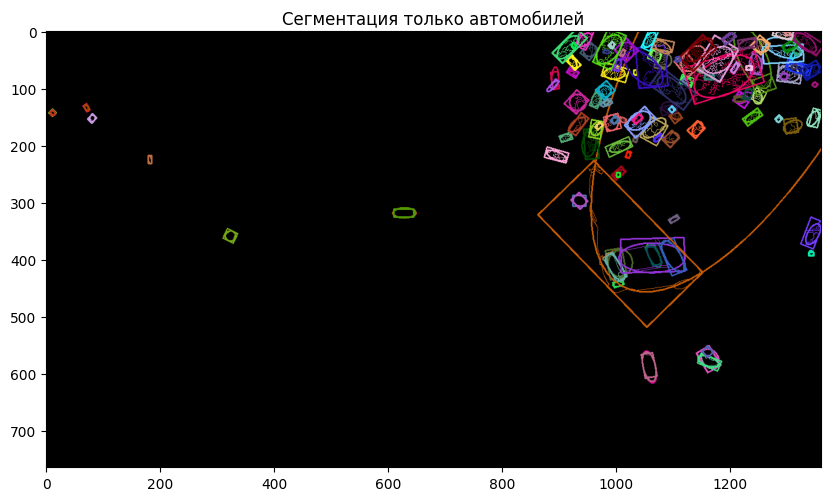

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

# Инициализация генератора случайных чисел для одинаковых цветов
rng.seed(12345)

# Пороговые значения для фильтрации контуров (эти значения можно корректировать)
MIN_AREA = 30      # минимальная площадь контура
MAX_AREA = 2000    # максимальная площадь контура
MAX_ASPECT_RATIO = 2.5  # максимальное допустимое соотношение длин сторон повернутого прямоугольника

def thresh_callback(val):
    threshold = val
    # Детектируем границы с помощью алгоритма Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)

    # Поиск контуров
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Списки для хранения данных только по "автомобильным" контурам
    vehicle_contours = []
    vehicle_minRects = []
    vehicle_minEllipses = []

    # Фильтрация найденных контуров по площади и соотношению сторон
    for i, c in enumerate(contours):
        area = cv.contourArea(c)
        if area < MIN_AREA or area > MAX_AREA:
            continue  # отсекаем контуры с площадью вне допустимого диапазона

        # Вычисляем минимальный повернутый прямоугольник
        rect = cv.minAreaRect(c)
        (w, h) = rect[1]  # размеры прямоугольника
        # Если один из размеров равен нулю, пропускаем
        if w == 0 or h == 0:
            continue
        # Вычисляем соотношение сторон (большая сторона делится на меньшую)
        aspect_ratio = max(w, h) / min(w, h)
        if aspect_ratio > MAX_ASPECT_RATIO:
            continue  # пропускаем контуры, не подходящие по форме

        vehicle_contours.append(c)
        vehicle_minRects.append(rect)
        # Если в контуре достаточно точек – аппроксимируем эллипс
        if c.shape[0] > 5:
            ell = cv.fitEllipse(c)
            vehicle_minEllipses.append(ell)
        else:
            vehicle_minEllipses.append(None)

    # Создаем пустое изображение для отрисовки результатов
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    # Отрисовка только отфильтрованных контуров с повернутыми прямоугольниками и эллипсами
    for i, c in enumerate(vehicle_contours):
        # Можно задать фиксированный цвет или рандомный
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # Отрисовка контура
        cv.drawContours(drawing, [c], -1, color, 1)
        # Отрисовка эллипса, если он был аппроксимирован
        if vehicle_minEllipses[i] is not None:
            cv.ellipse(drawing, vehicle_minEllipses[i], color, 2)
        # Отрисовка повернутого прямоугольника
        box = cv.boxPoints(vehicle_minRects[i])
        box = np.intp(box)
        cv.drawContours(drawing, [box], 0, color, 2)

    plt.figure(figsize=(10, 18))
    plt.imshow(drawing)
    plt.title("Сегментация только автомобилей")
    plt.show()

if __name__ == "__main__":
    inp = '0000026_00500_d_0000025.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    # Конвертация изображения в оттенки серого и размытие для уменьшения шума
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    src_gray = cv.blur(src_gray, (3, 3))

    # Отображаем исходное изображение
    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    plt.title("Исходное изображение")
    plt.show()

    thresh = 100  # исходное пороговое значение для детектора Canny
    thresh_callback(thresh)

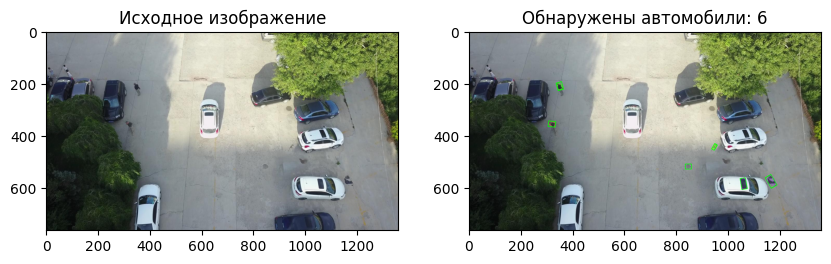

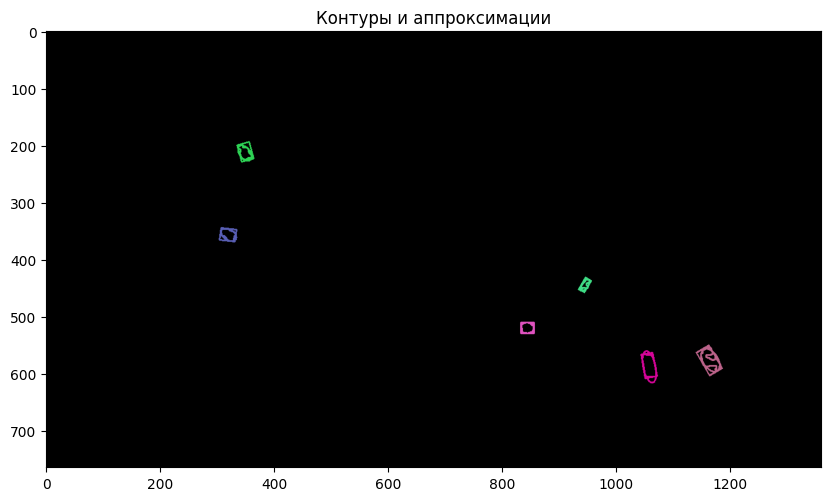

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)

def car_segmentation(image_path):
    src = cv.imread(cv.samples.findFile(image_path))
    if src is None:
        print('Could not open or find the image:', image_path)
        return None, None

    plt.figure(figsize=(10, 18))
    plt.subplot(121)
    plt.title("Исходное изображение")
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(src_gray)

    src_blur = cv.GaussianBlur(enhanced, (5, 5), 0)

    threshold = 100

    canny_output = cv.Canny(src_blur, threshold, threshold * 2)

    kernel = np.ones((3, 3), np.uint8)
    dilated = cv.dilate(canny_output, kernel, iterations=1)
    eroded = cv.erode(dilated, kernel, iterations=1)

    contours, hierarchy = cv.findContours(eroded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    drawing = np.zeros((src.shape[0], src.shape[1], 3), dtype=np.uint8)

    result_overlay = src.copy()

    # Параметры для фильтрации автомобилей
    min_car_area = 100  # Минимальная площадь контура для автомобиля
    max_car_area = 10000  # Максимальная площадь контура для автомобиля
    min_aspect_ratio = 0.4  # Минимальное соотношение сторон (ширина/высота)
    max_aspect_ratio = 2.5  # Максимальное соотношение сторон

    car_contours = []

    for i, contour in enumerate(contours):
        # Рассчитываем основные характеристики контура
        area = cv.contourArea(contour)

        if area < min_car_area or area > max_car_area:
            continue

        rect = cv.minAreaRect(contour)
        width, height = rect[1]

        if height == 0:
            continue

        aspect_ratio = width / height if width > height else height / width

        if aspect_ratio < min_aspect_ratio or aspect_ratio > max_aspect_ratio:
            continue

        rect_area = width * height
        if rect_area == 0:
            continue

        extent = area / rect_area
        if extent < 0.5:
            continue

        car_contours.append(contour)

        color = (rng.randint(0, 255), rng.randint(0, 255), rng.randint(0, 255))
        cv.drawContours(drawing, [contour], 0, color, 2)

        box = cv.boxPoints(rect)
        box = np.intp(box)
        cv.drawContours(drawing, [box], 0, color, 2)

        if contour.shape[0] > 5:
            ellipse = cv.fitEllipse(contour)
            cv.ellipse(drawing, ellipse, color, 2)

        cv.drawContours(result_overlay, [contour], 0, color, 2)
        cv.drawContours(result_overlay, [box], 0, (0, 255, 0), 2)

    plt.subplot(122)
    plt.title(f"Обнаружены автомобили: {len(car_contours)}")
    plt.imshow(cv.cvtColor(result_overlay, cv.COLOR_BGR2RGB))

    plt.figure(figsize=(10, 10))
    plt.title("Контуры и аппроксимации")
    plt.imshow(drawing)

    plt.show()

    return drawing, result_overlay

if __name__ == "__main__":
    image_path = '0000026_00500_d_0000025.jpg'
    car_segmentation(image_path)

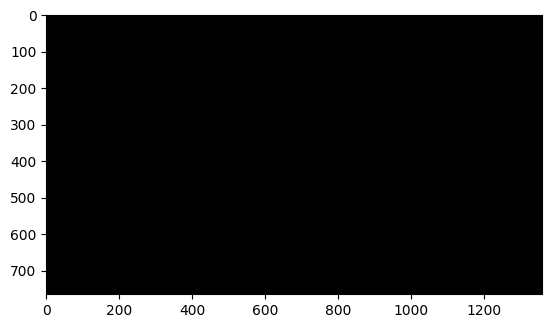

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

if __name__ == "__main__":
    kernel = None

    backgroundObject = cv.createBackgroundSubtractorMOG2(detectShadows = True)

    inp = '0000026_00500_d_0000025.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Could not open or find the image:', inp)
        exit(0)

    fgmask = backgroundObject.apply(src)
    #initialMask = fgmask.copy()

    # Perform thresholding to get rid of the shadows.
    _, fgmask = cv.threshold(fgmask, 250, 255, cv.THRESH_BINARY)
    #noisymask = fgmask.copy()

    fgmask = cv.erode(fgmask, kernel, iterations = 1)
    fgmask = cv.dilate(fgmask, kernel, iterations = 2)

    #plt.imshow(fgmask)

    contours, _ = cv.findContours(fgmask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    drawing = np.zeros((fgmask.shape[0], fgmask.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
      color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
      # contour
      cv.drawContours(drawing, contours, i, color)
      # ellipse
      if c.shape[0] > 5:
          cv.ellipse(drawing, minEllipse[i], color, 2)
      # rotated rectangle
      box = cv.boxPoints(minRect[i])
      box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
      cv.drawContours(drawing, [box], 0, color)

    plt.imshow(drawing)

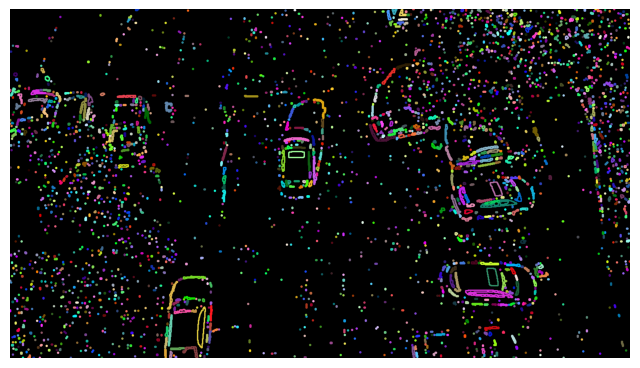

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

src = cv.imread('0000026_00500_d_0000025.jpg')
if src is None:
    print('Не удалось открыть или найти изображение.')
    exit(0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv.THRESH_BINARY_INV, 11, 2)

kernel = np.ones((3, 3), np.uint8)
adaptive_thresh = cv.morphologyEx(adaptive_thresh, cv.MORPH_OPEN, kernel, iterations=1)

contours, _ = cv.findContours(adaptive_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

drawing = np.zeros_like(src)
for cnt in contours:
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    cv.drawContours(drawing, [cnt], -1, color, 2)

drawing_rgb = cv.cvtColor(drawing, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(drawing_rgb)
plt.axis('off')
plt.show()

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def circle_segmentation(minDist=10, param1=100, param2=50, minRadius=60, maxRadius=0):
    threshold = 100
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

    #clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(3, 3))
    #enhanced = clahe.apply(src_gray)

    #plt.imshow(enhanced)

    #blurred = cv.medianBlur(src_gray, 5)
    #clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
    #enhanced = clahe.apply(src_gray)

    blurred = cv.GaussianBlur(src_gray, (5, 5), 0)

    canny_output = cv.Canny(blurred, int(0.5*threshold), int(threshold * 1.5))

    kernel = np.ones((5, 5), np.uint8)
    dilated = cv.dilate(canny_output, kernel, iterations=1) # +

    '''kernel2 = np.ones((3, 3), np.uint8)
    eroded = cv.erode(dilated, kernel2, iterations=1)

    closing = cv.morphologyEx(dilated, cv.MORPH_CLOSE, kernel)

    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)'''
    #dilated = cv.dilate(canny_output, np.ones((3, 3), np.uint8))
    #kernel = np.ones((5, 5), np.uint8)
    #dilated = cv.dilate(canny_output, kernel, iterations=1)

    eroded = cv.erode(dilated, kernel, iterations=1)

    plt.imshow(eroded)
    #print(param2)
    circles = cv.HoughCircles(eroded,
                              cv.HOUGH_GRADIENT,
                              dp=1.2,
                              minDist=minDist,
                              param1=param1,
                              param2=param2,
                              minRadius=10,
                              maxRadius=50)

    drawing = src.copy()

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            # Рисуем центр окружности
            cv.circle(drawing, center, 2, (0, 255, 0), 3)
            # Рисуем саму окружность
            cv.circle(drawing, center, radius, (255, 0, 255), 3)

    plt.figure(figsize=(10, 18))
    plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
    plt.title('Результат сегментации окружностями')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    inp = '0000026_00500_d_0000025.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Не удалось открыть или найти изображение:', inp)
        exit(0)

    circle_segmentation(minDist=100, param1=100, param2=30, minRadius=10, maxRadius=0)

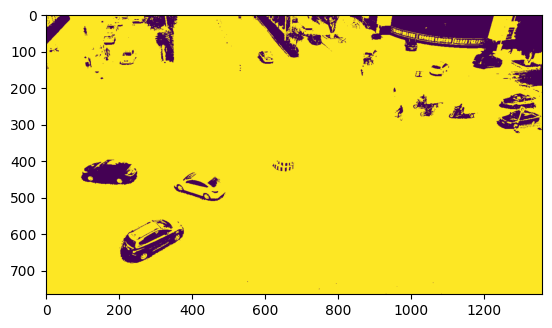

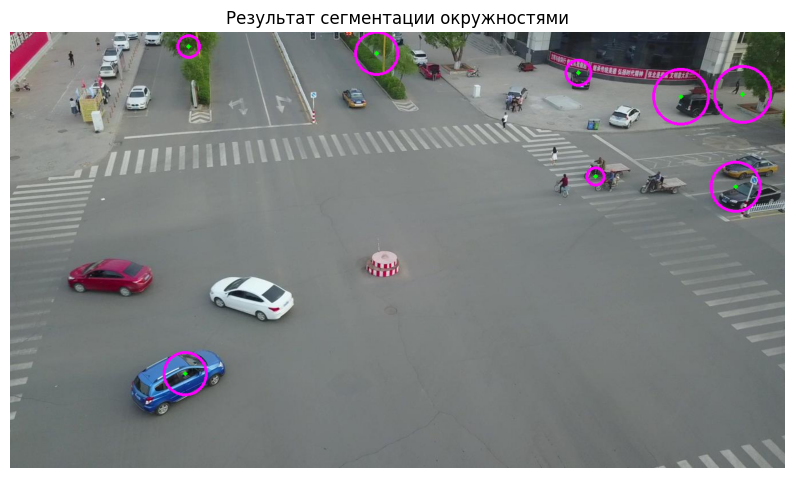

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

minDist=100
param1=100
param2=30

image_path = '0000330_03001_d_0000815.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f'Не удалось открыть изображение: {image_path}')
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
#closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(thresh)

circles = cv.HoughCircles(thresh,
                          cv.HOUGH_GRADIENT,
                          dp=1.2,
                          minDist=minDist,
                          param1=param1,
                          param2=param2,
                          minRadius=5,
                          maxRadius=50)

drawing = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv.circle(drawing, center, 2, (0, 255, 0), 3)
        cv.circle(drawing, center, radius, (255, 0, 255), 3)

plt.figure(figsize=(10, 18))
plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
plt.title('Результат сегментации окружностями')
plt.axis('off')
plt.show()

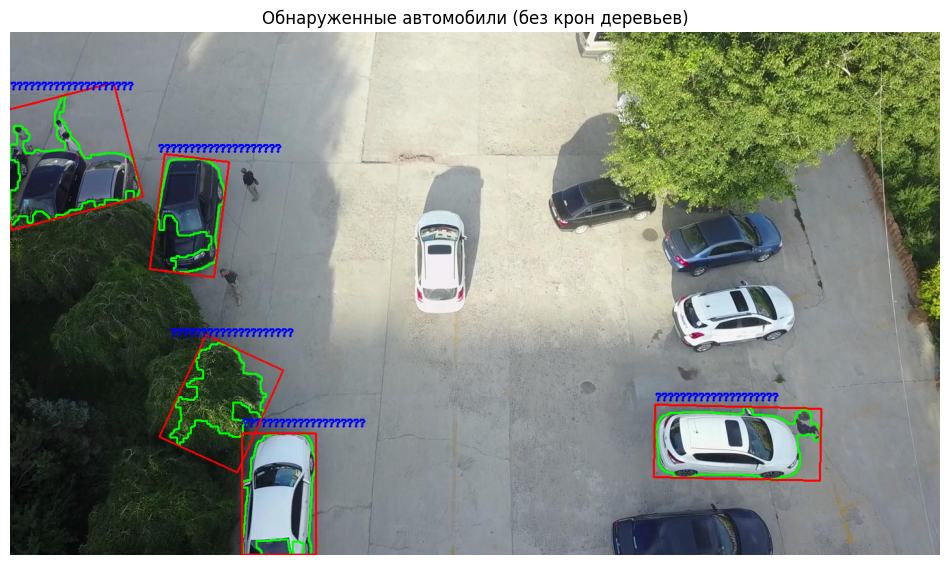

Результат сохранен как 'detected_cars_only.jpg'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '0000026_00500_d_0000025.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f'Не удалось открыть изображение: {image_path}')
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel, iterations=2)

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 1000 or area > 90000:
        continue

    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h

    if aspect_ratio < 0.5 or aspect_ratio > 3.0:
        continue

    rect_area = w * h
    extent = float(area) / rect_area

    if extent < 0.4:
        continue

    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])

        filtered_contours.append(contour)

result = image.copy()

cv2.drawContours(result, filtered_contours, -1, (0, 255, 0), 2)

for contour in filtered_contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.drawContours(result, [box], 0, (0, 0, 255), 2)

    x, y, w, h = cv2.boundingRect(contour)
    cv2.putText(result, 'Автомобиль', (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(result_rgb)
plt.title('Обнаруженные автомобили (без крон деревьев)')
plt.axis('off')
plt.show()

cv2.imwrite('detected_cars_only.jpg', result)
print("Результат сохранен как 'detected_cars_only.jpg'")

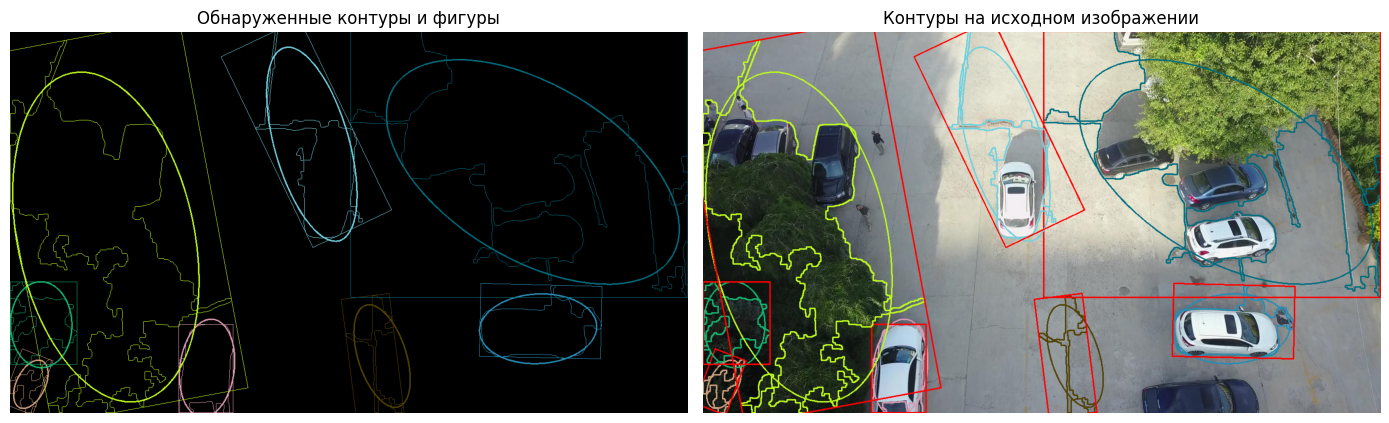

Результат сохранен как 'car_detection_with_ellipses.jpg'


In [ ]:
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

image_path = '0000026_00500_d_0000025.jpg'
image = cv.imread(image_path)

if image is None:
    print(f'Не удалось открыть изображение: {image_path}')
    exit()

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

blurred = cv.GaussianBlur(enhanced, (5, 5), 0)

edges = cv.Canny(blurred, 50, 150)

kernel = np.ones((5, 5), np.uint8)
dilated = cv.dilate(edges, kernel, iterations=1)
closed = cv.morphologyEx(dilated, cv.MORPH_CLOSE, kernel, iterations=2)

contours, _ = cv.findContours(closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

drawing = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

result = image.copy()

car_contours = []
for contour in contours:
    area = cv.contourArea(contour)
    if area < 1500:
        continue

    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = float(w) / h

    if 0.4 <= aspect_ratio <= 2.0:
        car_contours.append(contour)

minRect = [None] * len(car_contours)
minEllipse = [None] * len(car_contours)

for i, c in enumerate(car_contours):
    minRect[i] = cv.minAreaRect(c)
    if c.shape[0] > 5:
        minEllipse[i] = cv.fitEllipse(c)

for i, c in enumerate(car_contours):
    color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))

    cv.drawContours(drawing, car_contours, i, color)
    cv.drawContours(result, car_contours, i, color, 2)

    if c.shape[0] > 5:
        cv.ellipse(drawing, minEllipse[i], color, 2)
        cv.ellipse(result, minEllipse[i], color, 2)

    box = cv.boxPoints(minRect[i])
    box = np.intp(box)
    cv.drawContours(drawing, [box], 0, color)
    cv.drawContours(result, [box], 0, (0, 0, 255), 2)

drawing_rgb = cv.cvtColor(drawing, cv.COLOR_BGR2RGB)
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(drawing_rgb)
plt.title('Обнаруженные контуры и фигуры')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Контуры на исходном изображении')
plt.axis('off')

plt.tight_layout()
plt.show()

cv.imwrite('car_detection_with_ellipses.jpg', result)
print("Результат сохранен как 'car_detection_with_ellipses.jpg'")

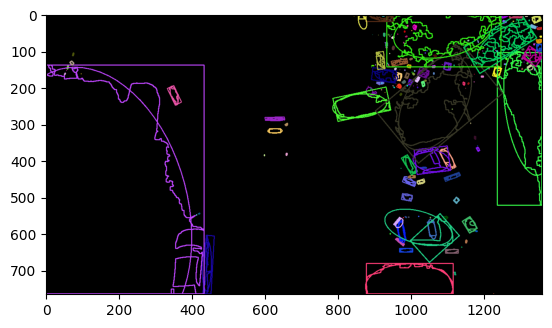

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import random as rng
import matplotlib.pyplot as plt

if __name__ == "__main__":
    inp = '0000026_00500_d_0000025.jpg'
    src = cv.imread(cv.samples.findFile(inp))
    if src is None:
        print('Ошибка:', inp)
        exit(0)

    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (5, 5), 0)

    _, thresh = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

    kernel = np.ones((3, 3), np.uint8)
    fgmask = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)

    contours, _ = cv.findContours(fgmask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    drawing = np.zeros((fgmask.shape[0], fgmask.shape[1], 3), dtype=np.uint8)

    for i, c in enumerate(contours):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, [c], -1, color, 2)

        rect = cv.minAreaRect(c)
        box = cv.boxPoints(rect)
        box = np.intp(box)
        cv.drawContours(drawing, [box], 0, color, 2)

        if len(c) >= 5:
            ellipse = cv.fitEllipse(c)
            cv.ellipse(drawing, ellipse, color, 2)

    plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
    plt.show()